# Network with Numpy

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
def sigmoid(vec):
    """ Sigmoid activation function

    Args:
        vec: input features vector
    """
    return 1/(1 + np.exp(-vec))


def diff_sigmoid(vec):
    """ derivative of the sigmoid 
    
    Args:
        vec: vector with respect to differentiate for
    """
    return sigmoid(vec) * (1. - sigmoid(vec))

In [6]:
class network(object):
    def __init__(self, n_features, alpha=0.01):
        """ Initalize weights and biases of the neural net """
        self.alpha = alpha

        self.W1 = np.random.rand(10, n_features) * 0.001
        self.W2 = np.random.rand(5, 10) * 0.001
        self.W3 = np.random.rand(1, 5) * 0.001
        
        self.b1 = np.ones((10, 1))
        self.b2 = np.ones((5, 1))
        self.b3 = np.ones((1, 1))

        # "memory" of the network
        # we keep intermediate results needed for the backpropagation

        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        self.z3 = None
        self.a3 = None        

    @staticmethod
    def cross_entropy_loss(y_hat, y):
        """ calculates the loss function 
        
            Args:
                y_hat: calculated output array
                y:     ground truth array      
        """
        y_hat = np.squeeze(y_hat)
        loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
        return - loss

    def forward_prop(self, x):
        """ Calculates the output of the neural net

        Args:
            x: input features vector
        """
        self.x = x
        self.z1 = np.dot(self.W1, x) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.W3, self.a2) + self.b3
        self.a3 = sigmoid(self.z3)  # output of the network

        return self.a3
    
    def backprop(self, y_hat, y):
        """ backpropagation """
        self.dCdz3 = y_hat - y
        self.dCdW3 = np.dot(self.dCdz3, self.a2.T)
        self.dCdb3 = self.dCdz3

        self.dCdz2 = np.dot(self.W3.T, self.dCdz3) * diff_sigmoid(self.z2)
        self.dCdW2 = np.dot(self.dCdz2, self.a1.T)
        self.dCdb2 = self.dCdz2

        self.dCdz1 = np.dot(self.W2.T, self.dCdz2) * diff_sigmoid(self.z1)
        self.dCdW1 = np.dot(self.dCdz1, self.x.T)
        self.dCdb1 = self.dCdz1        

        self.update()

    def update(self):
        """ update the weights and biases """
        self.W1 = self.W1 - self.alpha * np.squeeze(self.dCdW1)
        self.W2 = self.W2 - self.alpha * self.dCdW2
        self.W3 = self.W3 - self.alpha * self.dCdW3

        self.b1 = self.b1 - self.alpha * self.dCdb1
        self.b2 = self.b2 - self.alpha * self.dCdb2
        self.b3 = self.b3 - self.alpha * self.dCdb3

Epoch = 1, loss = [0.71124382]
Epoch = 2, loss = [0.6688253]
Epoch = 3, loss = [0.65884296]
Epoch = 4, loss = [0.64880122]
Epoch = 5, loss = [0.63209639]
Epoch = 6, loss = [0.60050683]
Epoch = 7, loss = [0.51997422]
Epoch = 8, loss = [0.22266076]
Epoch = 9, loss = [0.04125561]
Epoch = 10, loss = [0.01271195]
Epoch = 11, loss = [0.00572859]
Epoch = 12, loss = [0.00330693]
Epoch = 13, loss = [0.00228288]
Epoch = 14, loss = [0.00179631]
Epoch = 15, loss = [0.0015565]
Epoch = 16, loss = [0.00144812]
Epoch = 17, loss = [0.00141967]
Epoch = 18, loss = [0.00144618]
Epoch = 19, loss = [0.00151482]
Epoch = 20, loss = [0.0016187]
Epoch = 21, loss = [0.00175388]
Epoch = 22, loss = [0.00191771]
Epoch = 23, loss = [0.00210794]
Epoch = 24, loss = [0.00232204]
Epoch = 25, loss = [0.0025569]
Epoch = 26, loss = [0.00280868]
Epoch = 27, loss = [0.00307288]
Epoch = 28, loss = [0.00334463]
Epoch = 29, loss = [0.00361904]
Epoch = 30, loss = [0.00389158]
Epoch = 31, loss = [0.00415845]
Epoch = 32, loss = [0

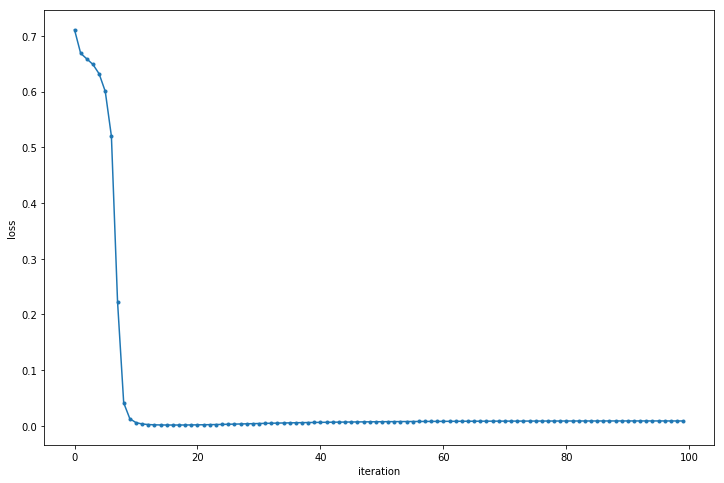

end


In [9]:
if __name__ == "__main__":

    iris = datasets.load_iris()
    df = np.c_[iris.data, iris.target]    
    np.random.shuffle(df)

    X = df[:, :-1]
    y = df[:, -1]

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)    
    y = scaler.fit_transform(y.reshape(-1, 1))   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    the_net = network(alpha=0.5, n_features=X_train.shape[1])

    epoch_loss = []
    for epoch in range(0, 100):
        # train and update one sample at a time
        for sample in range(X_train.shape[0]):
            x = np.expand_dims(X_train[sample, :], axis=1)
            # forward pass
            y_hat = the_net.forward_prop(x)
            # compute the loss
            loss = the_net.cross_entropy_loss(y_hat, y_train[sample])   
            # backpropagate and update weights and biases
            the_net.backprop(y_hat, y_train[sample])

            # print(1)

        print("Epoch = {}, loss = {}".format(epoch + 1, loss))
        epoch_loss.append(loss)

    plt.figure(figsize=(12, 8))
    plt.plot(epoch_loss, marker=".")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.show()
    print("end")